In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# read csv file
housing = pd.read_csv("housing.header.binary.txt")
housing.head()

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1


In [3]:
# 7.1
# Use “Crim” and “Rm” as independent variables to train a decision tree (0.5 pt) to predict whether a house value 
# Medv is 1 or 0 (i.e., whether the house value is greater than 230k or not).

features, labels = housing[["Crim", "Rm"]], housing.loc[:,['Medv']]

treeClassifier = tree.DecisionTreeClassifier(max_depth = 5)

# train the decision tree
treeClassifier.fit(features, labels)

DecisionTreeClassifier(max_depth=5)

Root node: Rm
Root node has gini index of 0.473 & split with the condition Rm <= 6.546
If Rm value is greater than equal to 6.546 right node is selected otherwise left


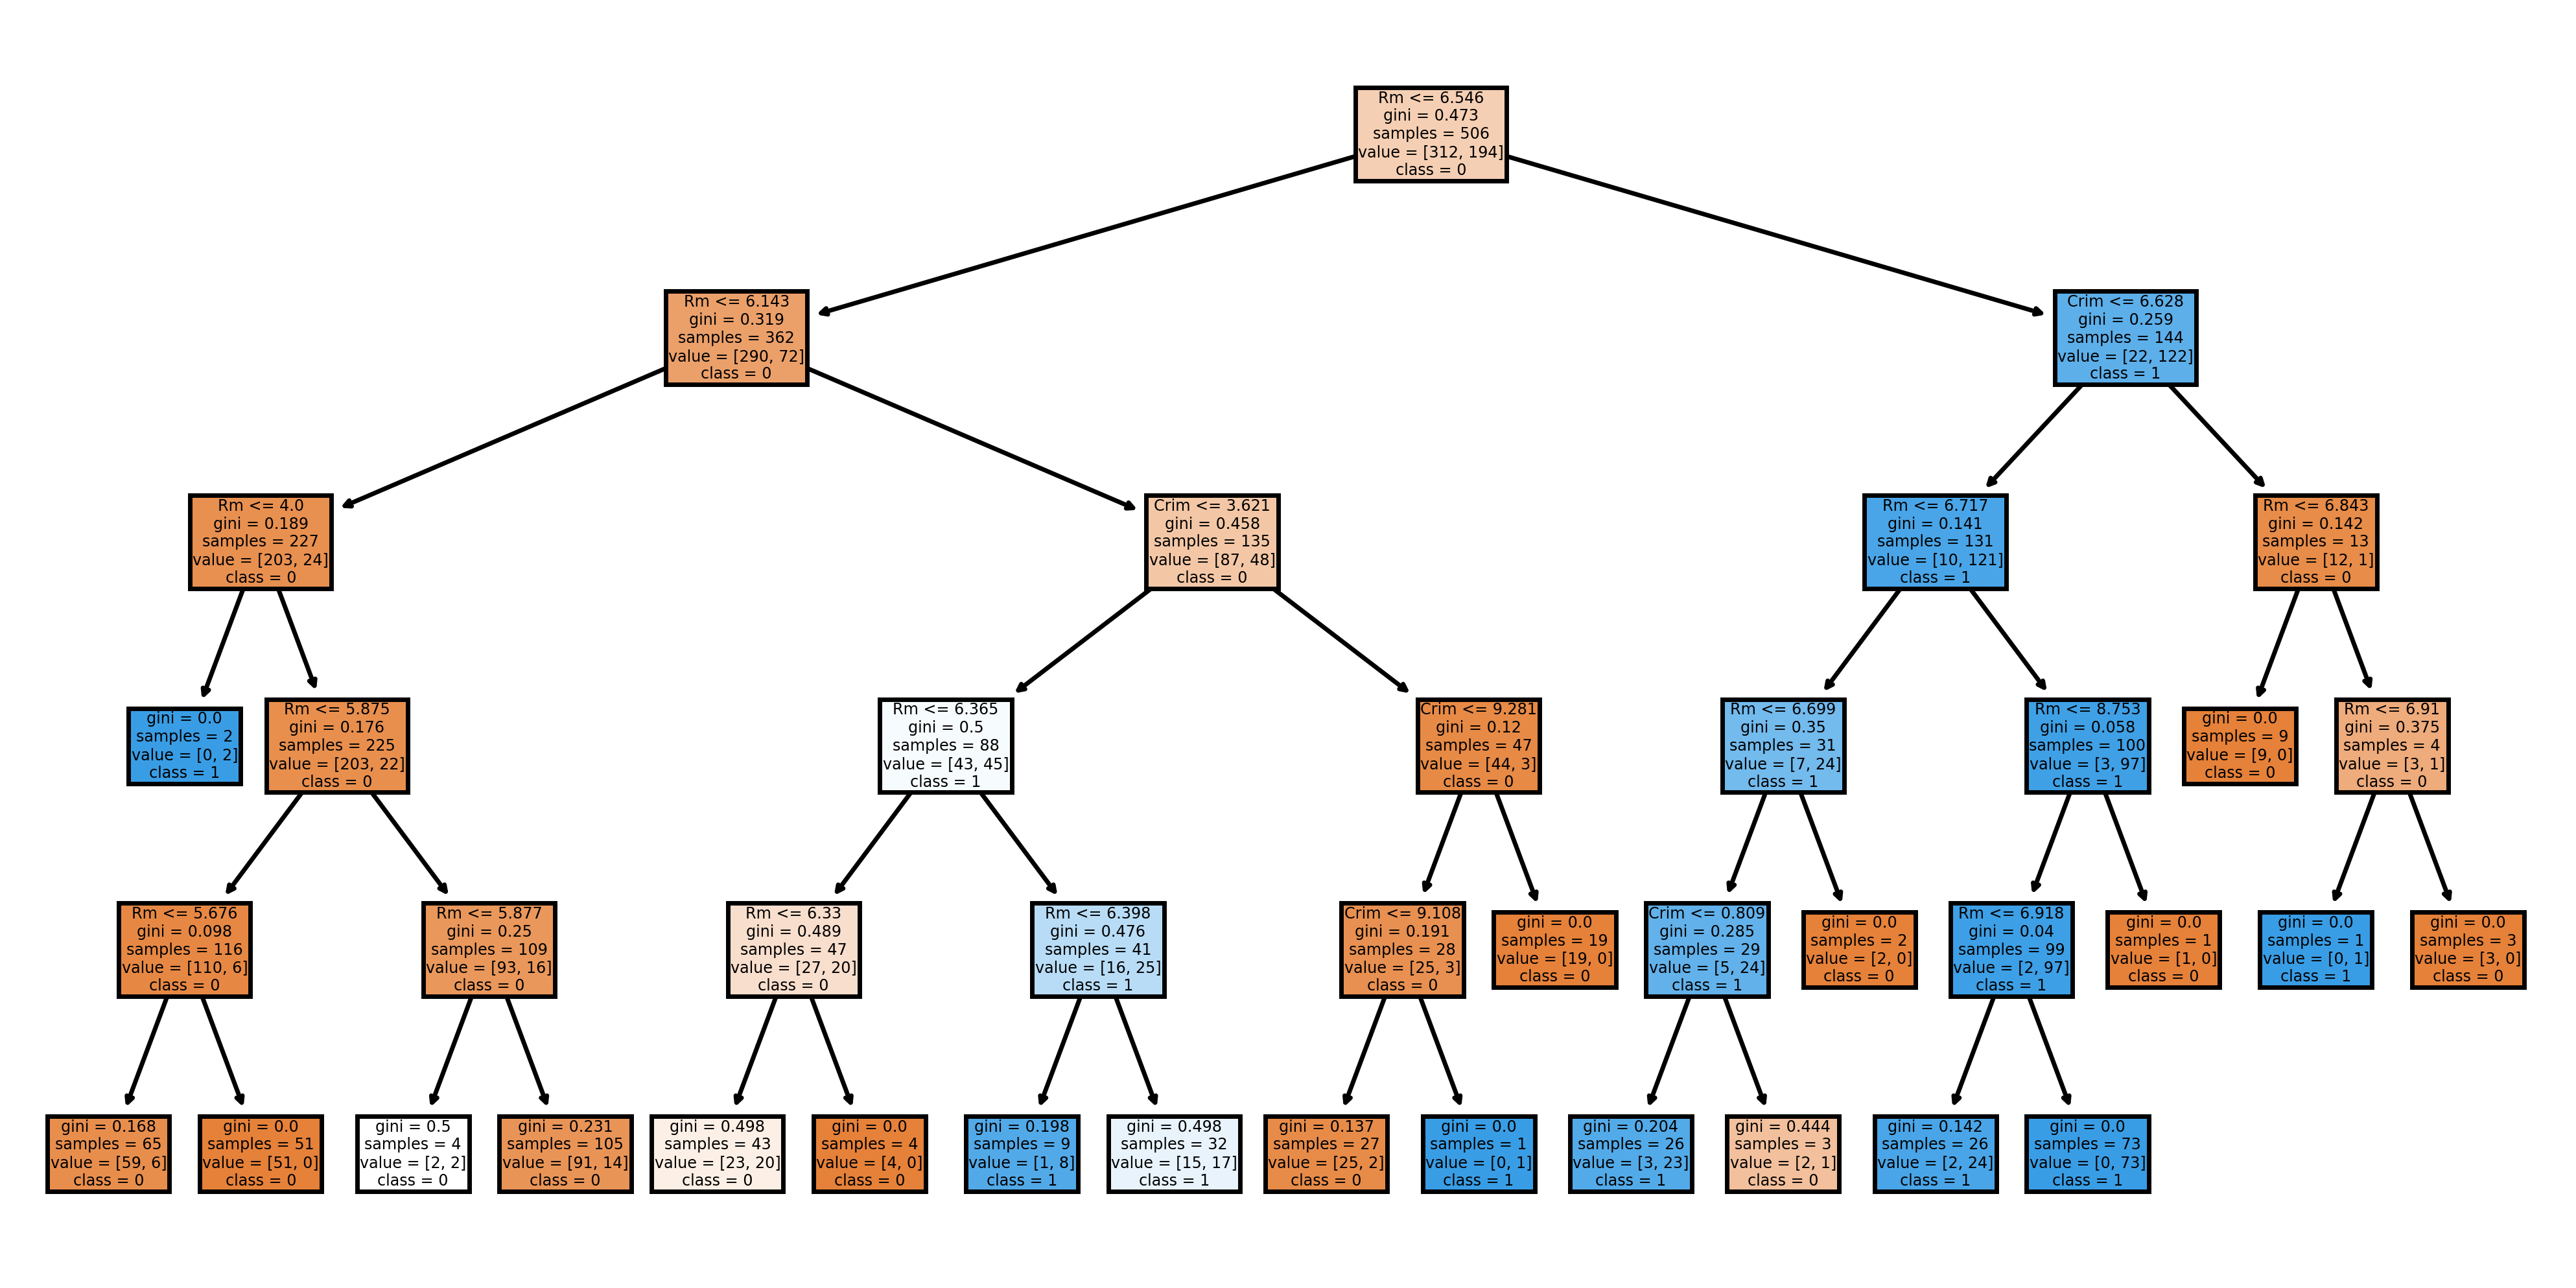

In [4]:
# 7.2
# Visualize the tree (including nodes and lables), and explain the meaning of the values showing in the root node (0.5 pt).
plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)

tree.plot_tree(treeClassifier,
               feature_names = features.columns, 
               class_names=['0','1'],
               filled = True);

print("Root node: Rm")
print("Root node has gini index of 0.473 & split with the condition Rm <= 6.546")
print("If Rm value is greater than equal to 6.546 right node is selected otherwise left")

In [5]:
# 8.1
# Please use 80% of instances in the “housing.header.binary.txt” dataset to build a decision tree classifier 
# (using all features) to predict house value Medv 

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# select all features & labels separately
features, labels = housing.loc[:,housing.columns != 'Medv'], housing.loc[:,['Medv']]

# split the dataset in 80% training & 20% test datasets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.2, random_state=42)

# decision tree model
treeClassifier = tree.DecisionTreeClassifier(max_depth = 5)

# fit the training data
treeClassifier.fit(features_train, labels_train)

# predict with test data
labels_predict = treeClassifier.predict(features_test)

In [6]:
# 8.2 
# Report confusion table, TPR, FPR, and the Accuracy

confusion_mat = confusion_matrix(labels_test, labels_predict)

tn, fp, fn, tp = confusion_mat.ravel()
print("Confusion matrix:\n", confusion_mat)

accuracy = accuracy_score(labels_test, labels_predict)
print("Accuracy: ", accuracy)

Confusion matrix:
 [[61  6]
 [ 8 27]]
Accuracy:  0.8627450980392157


In [8]:
# 8.2
# Report the ROC curve
proba = treeClassifier.predict_proba(features_test)
auc_score = roc_auc_score(labels_test, proba[:,1])
print("AUC value is %f" % auc_score)

AUC value is 0.822388


In [9]:
# FPR & TPR

fpr, tpr, thresholds = metrics.roc_curve(labels_test, proba[:,1], pos_label=1)
print("FPR: ", fpr)
print("TRP: ", tpr)

FPR:  [0.         0.01492537 0.05970149 0.08955224 0.11940299 0.13432836
 0.94029851 1.        ]
TRP:  [0.         0.51428571 0.65714286 0.77142857 0.8        0.8
 0.88571429 1.        ]


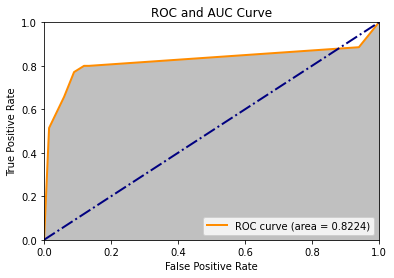

In [11]:
# ROC & AUC Curve

plt.figure()
plt.rcParams.update({'font.size': 10})

# ROC curve of the classifer
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.4f)' % auc_score)

# ROC curve of random classifer
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-.')

# x & y axis, max limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# AUC - area under the curve in silver
plt.fill_between(fpr, 0, tpr, color="silver")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
# 8.3
# Create a new instance with “Crim=0.03, Zn=13, Indus=3.5, Chas=0.3, Nox=0.58, Rm=4.1, Age=68, Dis=4.98, Rad =3, Tax=225, Ptratio=17, B=396, Lstat=7.56”, 
# and predict the Medv value of the instance. Report the classification result 

new_instance = {'Crim':[0.03], 'Zn':[13], 'Indus':[3.5], 'Chas':[0.3], 'Nox':[0.58], 'Rm':[4.1], 'Age':[68], 
        'Dis':[4.98], 'Rad':[3], 'Tax':[225], 'Ptratio':[17], 'B':[396], 'Lstat':[7.56]}

new_features = pd.DataFrame(new_instance)
new_predict = treeClassifier.predict(new_features)

print("Prediction on new instance is: ", 
      new_predict[0], 
      ". Value of the new home is", 
      "GREATER" if new_predict[0] == 1 else "LESS",
      "than $230k.")

Prediction on new instance is:  0 . Value of the new home is LESS than $230k.
